## Final Project

In [15]:
pip install fredapi


Note: you may need to restart the kernel to use updated packages.


In [16]:
#import the library and tools
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
import scipy.stats as ss
import yfinance as yf

start_date = datetime(2020,1,31)
end_date = datetime(2024,8,31)

In [17]:
#download the datasets
stock = yf.download('TSLA',start= start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


## Stock Analysis and Competitor Summary

In [18]:
#Stock Analysis and Competitor Summary(Assignment1)
stock.info()
print(stock.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1154 entries, 2020-01-31 to 2024-08-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1154 non-null   float64
 1   High       1154 non-null   float64
 2   Low        1154 non-null   float64
 3   Close      1154 non-null   float64
 4   Adj Close  1154 non-null   float64
 5   Volume     1154 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 63.1 KB
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-31  42.666668  43.533333  42.167999  43.371334  43.371334  235789500
2020-02-03  44.912666  52.409332  44.901333  52.000000  52.000000  705975000
2020-02-04  58.863998  64.599335  55.591999  59.137333  59.137333  914082000
2020-02-05  54.883999  56.398666  46.940666  48.980000  48.980000  726357000
2020-02-06  46.661331  53.055332  45.799999

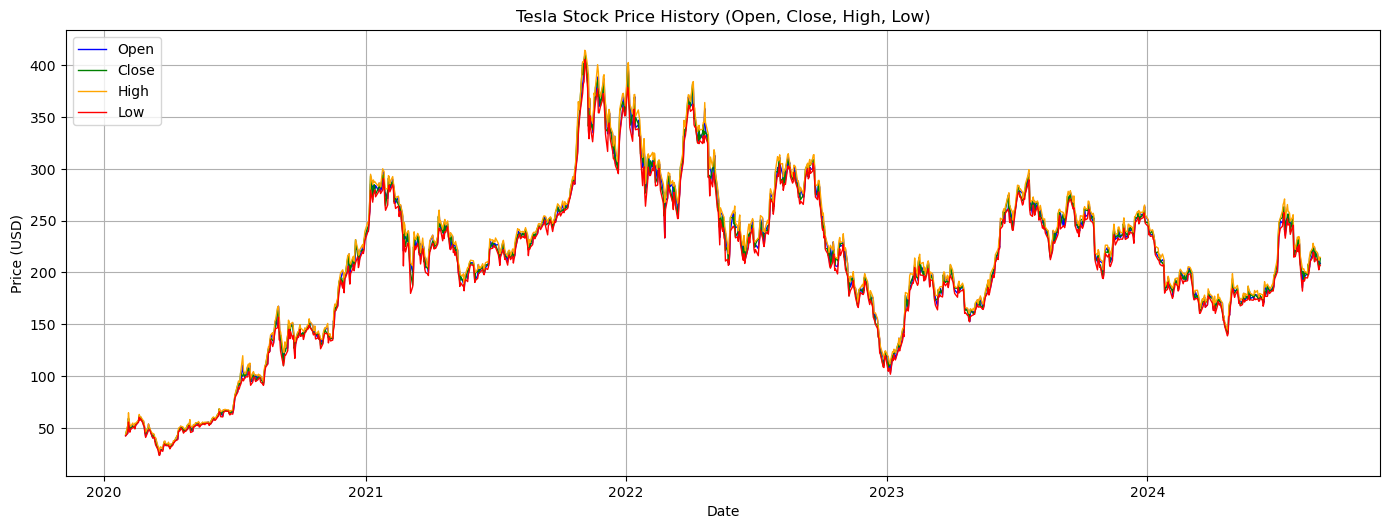

In [19]:
#Plot the stock price history(Open, Close, High, Low)
# Ensure index is datetime for Matplotlib compatibility
stock.index = pd.to_datetime(stock.index)

plt.figure(figsize=(14, 10))

# Plot Open, Close, High, Low
plt.subplot(2, 1, 1)
plt.plot(stock.index, stock['Open'], label='Open', color='blue', linewidth=1)
plt.plot(stock.index, stock['Close'], label='Close', color='green', linewidth=1)
plt.plot(stock.index, stock['High'], label='High', color='orange', linewidth=1)
plt.plot(stock.index, stock['Low'], label='Low', color='red', linewidth=1)
plt.title('Tesla Stock Price History (Open, Close, High, Low)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


## Find 3 competitors and visualize their stock price history in the same time period - BMW, NIO, and BYD

[*********************100%***********************]  3 of 3 completed


Price                      Adj Close                       Close             \
Ticker                        BMW.DE        BYD   NIO     BMW.DE        BYD   
Date                                                                          
2020-01-31 00:00:00+00:00  46.924061  28.973955  3.78  64.339996  29.850000   
2020-02-03 00:00:00+00:00  46.953239  29.527224  4.06  64.379997  30.420000   
2020-02-04 00:00:00+00:00  47.368942  30.391102  4.51  64.949997  31.309999   
2020-02-05 00:00:00+00:00  48.295177  31.119091  4.39  66.220001  32.060001   
2020-02-06 00:00:00+00:00  48.375401  31.827665  4.08  66.330002  32.790001   

Price                                 High                         Low  \
Ticker                      NIO     BMW.DE        BYD   NIO     BMW.DE   
Date                                                                     
2020-01-31 00:00:00+00:00  3.78  65.680000  31.129999  4.04  64.209999   
2020-02-03 00:00:00+00:00  4.06  64.750000  30.670000  4.11  63.900002 

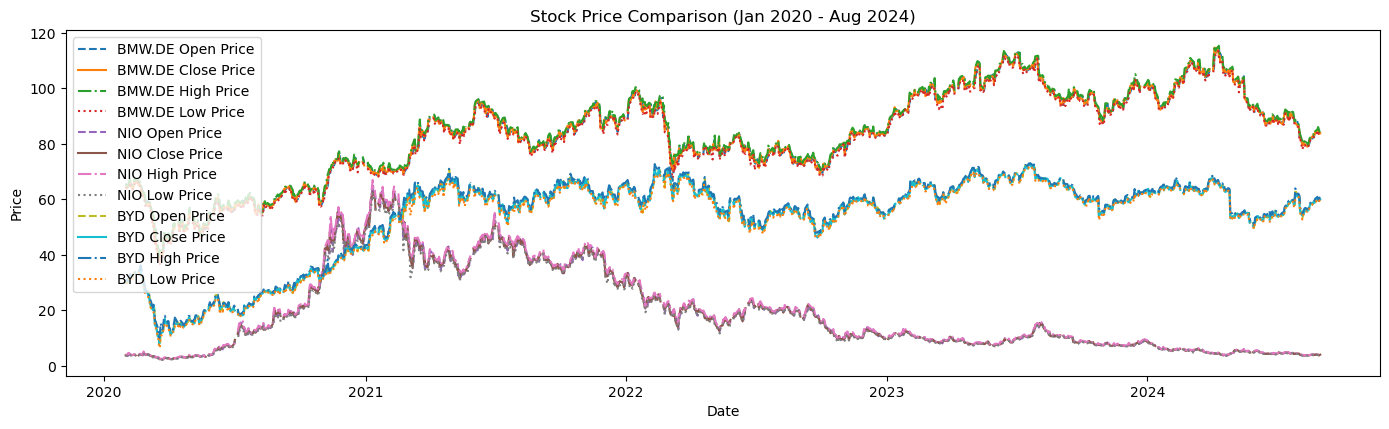

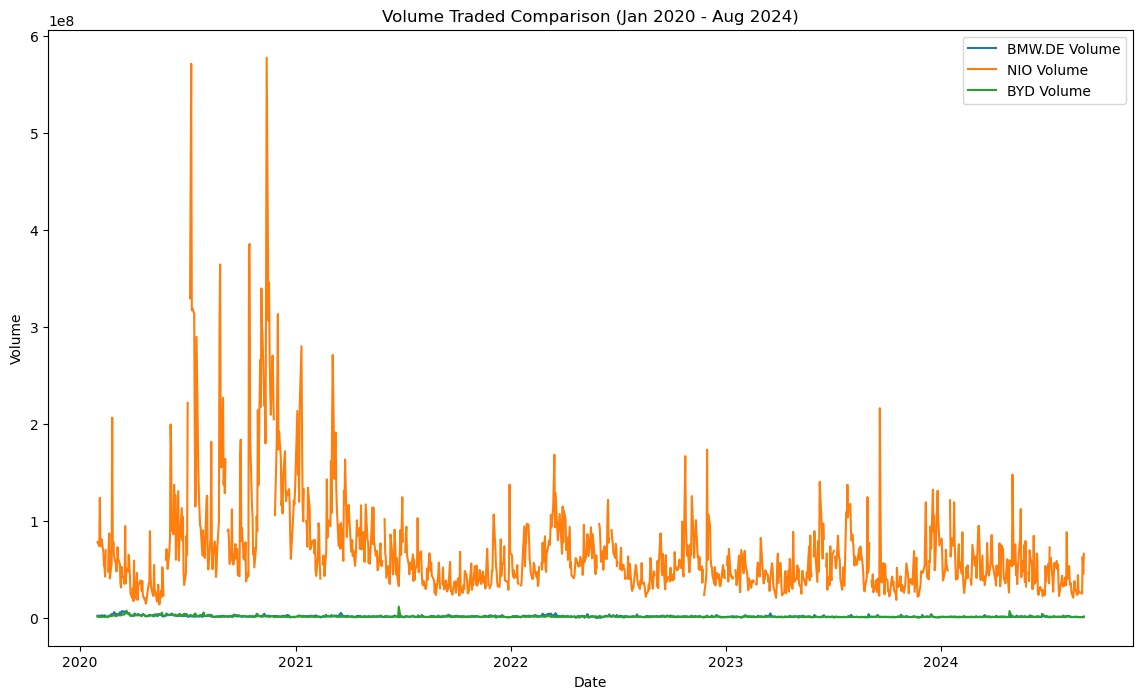

In [20]:
tickers = ['BMW.DE', 'NIO', 'BYD', ]

#download the stock data from yfinance:
data = yf.download(tickers, start = start_date, end = end_date )
print(data.head())

# Visualize Open, Close, High, Low prices for all tickers
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)# Loop through each ticker and plot Open, Close, High, and Low prices
for ticker in tickers:
    plt.plot(data['Open'][ticker], label=f'{ticker} Open Price', linestyle='--') 
    plt.plot(data['Close'][ticker], label=f'{ticker} Close Price')  
    plt.plot(data['High'][ticker], label=f'{ticker} High Price', linestyle='-.')  
    plt.plot(data['Low'][ticker], label=f'{ticker} Low Price', linestyle=':')  
    
plt.title('Stock Price Comparison (Jan 2020 - Aug 2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend() 
plt.tight_layout()
plt.show()


# Visualize Volume traded for all tickers
plt.figure(figsize=(14, 8))


# Loop through each ticker and plot trading volume
for ticker in tickers:
    plt.plot(data['Volume'][ticker], label=f'{ticker} Volume')

# Set the title and axis labels for the volume plot
plt.title('Volume Traded Comparison (Jan 2020 - Aug 2024)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend() 
plt.show()

## Extracting the adjusted close of Tesla, calculating mean, variance, skewness and kurtosis, and kernel density estimation¶

mean: 210.14264989684318
variance: 6012.5161981367355
Skewness: -0.32115954806352676
Kurtosis: 0.0443775961996411


Text(0.5, 0, 'Adjusted Close Price (USD)')

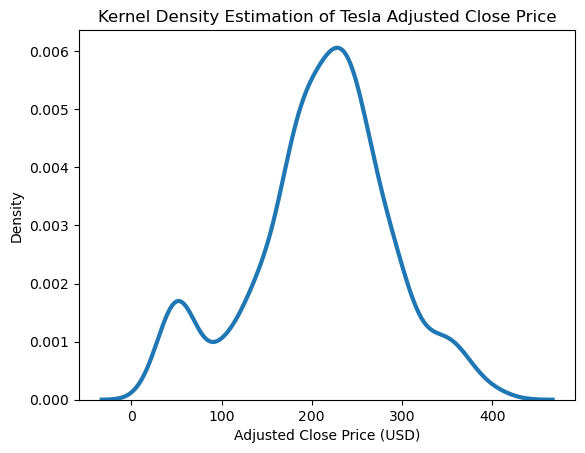

In [21]:
# extract the adjusted close column from the datasets
adjusted_close = stock['Adj Close'].dropna()

# calculate the mean, variance, skewness, and kurtosis of the adjusted close column
mean_adj_close = np.mean(adjusted_close)
variance_adj_close = np.var(adjusted_close)
skewness_adj_close = ss.skew(adjusted_close)
kurtosis_adj_close = ss.kurtosis(adjusted_close)

#Display the values:
print("mean:", mean_adj_close)
print("variance:",variance_adj_close)
print("Skewness:", skewness_adj_close)
print("Kurtosis:", kurtosis_adj_close)
sns.kdeplot(data=adjusted_close,linewidth=3)
plt.title('Kernel Density Estimation of Tesla Adjusted Close Price')
plt.xlabel('Adjusted Close Price (USD)')

## Feature Database Creation

In [31]:

# Download Tesla data from Yahoo Finance
start_date = datetime(2017,1,31)
end_date = datetime(2024,8,31)

tesla_data = yf.download('TSLA', start=start_date, end=end_date)

# Calculate daily returns
tesla_data['Return'] = tesla_data['Adj Close'].pct_change()

# Preview the data
print(tesla_data.head())

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2017-01-31  16.615999  17.059334  16.513332  16.795334  16.795334  61741500   
2017-02-01  16.870001  16.879999  16.603333  16.615999  16.615999  59382000   
2017-02-02  16.556000  16.827999  16.514000  16.770000  16.770000  37497000   
2017-02-03  16.794001  16.812000  16.645332  16.755333  16.755333  32800500   
2017-02-06  16.733334  17.188000  16.708668  17.184668  17.184668  53437500   

              Return  
Date                  
2017-01-31       NaN  
2017-02-01 -0.010678  
2017-02-02  0.009268  
2017-02-03 -0.000875  
2017-02-06  0.025624  


#### 1. FAMA-FRENCH 5 FACTORS

In [41]:
# Get the Fama French 5 factor model (monthly data)
data_ff5 = pd.read_csv('FF_Research_Data_5_Factors_daily.csv')
data_ff5['date'] = data_ff5['date'].astype(str).str[0:4]+'-'\
                    +data_ff5['date'].astype(str).str[4:6]+'-'\
                    +data_ff5['date'].astype(str).str[6:8]
                    
data_ff5['date'] = pd.to_datetime(data_ff5['date'])
# data_ff5['date'] = data_ff5['date'].dt.date
df_ffs = data_ff5.set_index('date')

#### 2. ADS INDEX

In [42]:
data_ads = pd.read_excel('ADS_Index_Most_Current_Vintage.xlsx')
# manually replace : into -
df_ads = data_ads.set_index('date')
df_ads.head()

,ADS_Index
date,
1960-03-01,-0.569062
1960-03-02,-0.617724
1960-03-03,-0.663306
1960-03-04,-0.705824
1960-03-05,-0.745294


#### 3. Feature Selection from FRED

In [43]:

fred = Fred(api_key='add your api key and dont forget to remove it before commit')
varList = [
    'T10Y3M', 'DGS10', 'OBMMIJUMBO30YF',  # Term premium, 30-year jumbo mortgage
    'DEXUSEU', 'DEXJPUS', 'DEXUSUK',       # Spot exchange rates
    'CBBTCUSD', 'CBETHUSD',                # Cryptocurrencies
    'T10YIE', 'DCOILBRENTEU',              # Breakeven inflation, Brent oil price
    'VIXCLS', 'CBSICO',                    # Implied volatilities, consumer sentiment
    'DAAA', 'DBAA',                        # Corporate bond yields
    'AMERIBOR', 'T5YIE', 'BAMLH0A0HYM2', 'BAMLH0A0HYM2EY', 
    'DGS1', 'DCOILWTICO', 'DHHNGSP',        # Additional economic indicators
    'ALTSALES',                             # Light Weight Vehicle Sales: Autos and Light Trucks
    
]

# also look at https://tradingeconomics.com/commodity/

SP500 = fred.get_series('SP500')
SP500.name = 'SP500'
df_fred = SP500

# merge data series
for i in range(0, len(varList)):
    series_info = fred.get_series_info(varList[i])

    # Extract the title
    title = series_info['title']
    print(varList[i],'-', title)
    
    data = fred.get_series(varList[i])
    data.name = varList[i]
    df_fred = pd.merge(df_fred, data, left_index=True, right_index=True)

T10Y3M - 10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity
DGS10 - Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis
OBMMIJUMBO30YF - 30-Year Fixed Rate Jumbo Mortgage Index
DEXUSEU - U.S. Dollars to Euro Spot Exchange Rate
DEXJPUS - Japanese Yen to U.S. Dollar Spot Exchange Rate
DEXUSUK - U.S. Dollars to U.K. Pound Sterling Spot Exchange Rate
CBBTCUSD - Coinbase Bitcoin
CBETHUSD - Coinbase Ethereum
T10YIE - 10-Year Breakeven Inflation Rate
DCOILBRENTEU - Crude Oil Prices: Brent - Europe
VIXCLS - CBOE Volatility Index: VIX
CBSICO - CSBS Community Bank Sentiment Index
DAAA - Moody's Seasoned Aaa Corporate Bond Yield
DBAA - Moody's Seasoned Baa Corporate Bond Yield
AMERIBOR - Overnight Unsecured AMERIBOR Benchmark Interest Rate
T5YIE - 5-Year Breakeven Inflation Rate
BAMLH0A0HYM2 - ICE BofA US High Yield Index Option-Adjusted Spread
BAMLH0A0HYM2EY - ICE BofA US High Yield Index Effective Yield
DGS1 - Market Yiel

In [44]:
df_fred.head()

,SP500,T10Y3M,DGS10,OBMMIJUMBO30YF,DEXUSEU,DEXJPUS,DEXUSUK,CBBTCUSD,CBETHUSD,T10YIE,...,CBSICO,DAAA,DBAA,AMERIBOR,T5YIE,BAMLH0A0HYM2,BAMLH0A0HYM2EY,DGS1,DCOILWTICO,DHHNGSP
2019-04-01,2867.19,0.06,2.49,4.285,1.1210,111.29,1.3144,4137.00,141.00,1.90,...,122.49424,3.68,4.73,2.519720,1.82,3.94,6.31,2.41,61.59,2.73
2019-07-01,2964.33,-0.18,2.03,4.040,1.1307,108.42,1.2644,10570.62,293.76,1.69,...,120.98675,3.27,4.32,2.420033,1.53,3.99,5.86,1.94,58.91,2.33
2019-10-01,2940.25,-0.17,1.65,3.854,1.0932,107.70,1.2242,8323.43,176.25,1.52,...,122.85714,2.97,3.87,1.909522,1.33,4.08,5.66,1.73,53.60,2.36
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7174.32,130.05,NaN,...,91.25138,NaN,NaN,1.604667,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,2470.50,0.53,0.62,3.725,1.0934,107.05,1.2394,6719.39,137.66,0.91,...,90.47619,2.76,4.59,0.165341,0.56,9.11,9.53,0.16,20.28,1.69


In [45]:
start_date = '2017-1-1'
end_date = '2024-08-31'
mask = (df_ffs.index >= start_date) & (df_ffs.index <= end_date)
df_ffs = df_ffs.loc[mask]

DATA_part1 = pd.merge(df_ffs, df_ads, left_index=True, right_index=True)
DATA = pd.merge(DATA_part1, df_fred, left_index=True, right_index=True)
DATA.reset_index(inplace=True)
DATA = DATA.rename(columns = {'index':'Date'})

DATA.to_csv('INFO6105_FeatureMart.csv', index=True)

#### Feature Database

In [46]:
# Load Tesla data
tesla = yf.download('TSLA', start='2017-01-01', end='2024-01-01', progress=False)

# Add technical indicators
tesla['SMA_20'] = tesla['Adj Close'].rolling(window=20).mean()
tesla['SMA_50'] = tesla['Adj Close'].rolling(window=50).mean()
tesla['RSI'] = (100 - (100 / (1 + tesla['Adj Close'].diff().apply(lambda x: max(x, 0)).rolling(14).mean() /
                              tesla['Adj Close'].diff().apply(lambda x: abs(x)).rolling(14).mean())))
tesla['Log_Return'] = np.log(tesla['Adj Close'] / tesla['Adj Close'].shift(1))

DATA1 = DATA.reset_index()
merged_df = pd.merge(DATA1, tesla, on="Date", how="inner")  # Use 'outer' for an outer join


# Target variable (price or return)
merged_df['Target'] = merged_df['Log_Return']
merged_df.head()


numeric_columns = merged_df.select_dtypes(include=['number']).drop(columns=['Target','index'])

scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(numeric_columns),
                                columns=numeric_columns.columns,
                                index=merged_df.index)

# Combine scaled features with non-numeric columns and the target
non_numeric_columns = merged_df.select_dtypes(exclude=['number'])
merged_df_scaled = pd.concat([non_numeric_columns, scaled_features, merged_df['Target']], axis=1)

# Display the result
merged_df_scaled.head()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,ADS_Index,SP500,T10Y3M,...,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,RSI,Log_Return,Target
0,2019-04-01,0.639308,0.064508,1.425347,0.522587,-0.378753,1.889556,0.115955,-0.971247,-1.069436,...,-1.102876,-1.095754,-1.096738,-1.096738,0.188005,-1.119646,-1.111297,-0.365816,0.813561,0.032760
1,2019-07-01,0.368595,-0.393293,0.232393,0.328195,0.376897,1.623080,0.147367,-0.828452,-1.410828,...,-1.134958,-1.128053,-1.132655,-1.132655,0.217901,-1.157917,-1.155610,0.133565,0.316596,0.016466
2,2019-10-01,-0.898835,-0.461963,-0.257569,0.966913,-0.113255,1.090129,0.084008,-0.863850,-1.396604,...,-1.127610,-1.120507,-1.122507,-1.122507,-0.377337,-1.144033,-1.148660,-0.835144,0.294286,0.015735
3,2020-04-01,-2.867659,-1.995599,-1.120330,1.300157,0.724087,-0.775203,-3.038380,-1.554378,-0.400877,...,-0.974348,-0.981929,-0.985309,-0.985309,1.709711,-0.962684,-0.888250,-1.389191,-2.761734,-0.084461
4,2020-07-01,0.159408,-1.675138,-2.377191,-0.477145,-2.216820,-0.508727,1.132839,-0.605704,-0.372428,...,-0.618998,-0.626398,-0.615729,-0.615729,1.702077,-0.676713,-0.752024,0.707220,0.918887,0.036213


####  Please use the features/factors you take and discovered (e.g. FRED, Fama-French website, ADS, momentum factors, technical indicators, volume, price/return lags, etc.) to construct a feature database

In [6]:

import pandas as pd
import numpy as np
from fredapi import Fred
import yfinance as yf

# 1. FAMA-FRENCH 5 FACTORS
# Get the Fama French 5 factor model (monthly data)
data_ff5 = pd.read_csv('FF_Research_Data_5_Factors_daily.csv')
data_ff5['date'] = data_ff5['date'].astype(str).str[0:4]+'-'\
                    +data_ff5['date'].astype(str).str[4:6]+'-'\
                    +data_ff5['date'].astype(str).str[6:8]
                    
data_ff5['date'] = pd.to_datetime(data_ff5['date'])
# data_ff5['date'] = data_ff5['date'].dt.date
df_ffs = data_ff5.set_index('date')

# 2. ADS INDEX
data_ads = pd.read_excel('ADS_Index_Most_Current_Vintage.xlsx')
data_ads['date'] = pd.to_datetime(data_ads['date'])
df_ads = data_ads.set_index('date')


# 3. FRED DATA
fred = Fred(api_key='e2b9d6351c036c7e0a59b80b5713645a')
varList = ['T10Y3M', 'DGS10', 'OBMMIJUMBO30YF',  # term premium 10yr-3mon, 30 yr mortgage jumbo loan
           'DEXUSEU', 'DEXJPUS', 'DEXUSUK', # spot exchange rates to EUR, JPY, GBP 
           'CBBTCUSD', 'CBETHUSD',  # cryptocurrencies
               'T10YIE', 'DCOILBRENTEU', # breakeven inflation + brent oil price 
               'VIXCLS', # implied volatilities
               'DAAA', 'DBAA', # corporate bond yield
              'AMERIBOR', 'T5YIE', 'BAMLH0A0HYM2','BAMLH0A0HYM2EY', 'DGS1', 'DCOILWTICO', 
                              'DHHNGSP'] 
SP500 = fred.get_series('SP500')
SP500.name = 'SP500'
df_fred = SP500
# merge data series
for i in range(0, len(varList)):
    data = fred.get_series(varList[i])
    data.name = varList[i]
    df_fred = pd.merge(df_fred, data, left_index=True, right_index=True)

# Resample Fama-French, ADS, and FRED data to daily frequency
df_ffs_daily = df_ffs.resample('D').interpolate(method='linear')
df_ads_daily = df_ads.resample('D').interpolate(method='linear')
df_fred_daily = df_fred.resample('D').interpolate(method='linear')

# 4. STOCK DATA (TESLA)
stock_symbol = 'TSLA'
start_date = '2020-01-01'
end_date = '2024-08-31'
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Add technical indicators

# Calculate Simple Moving Averages (SMA)
stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()

# Calculate Exponential Moving Averages (EMA)
stock_data['EMA_20'] = stock_data['Close'].ewm(span=20, adjust=False).mean()
stock_data['EMA_50'] = stock_data['Close'].ewm(span=50, adjust=False).mean()

def compute_RSI(data, window=14):
    diff = data.diff(1)
    gain = diff.where(diff > 0, 0).rolling(window=window).mean()
    loss = -diff.where(diff < 0, 0).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))
# Calculate RSI
stock_data['RSI'] = compute_RSI(stock_data['Close'], window=14)

# Calculate Momentum for multiple periods for Tesla stock
momentum_periods = [10, 20, 50]
for period in momentum_periods:
    stock_data[f'Momentum_{period}'] = stock_data['Close'] - stock_data['Close'].shift(period)

def compute_MACD(data, span_long=26, span_short=12, span_signal=9):
    EMA_short = data.ewm(span=span_short, adjust=False).mean()
    EMA_long = data.ewm(span=span_long, adjust=False).mean()
    MACD_line = EMA_short - EMA_long
    signal_line = MACD_line.ewm(span=span_signal, adjust=False).mean()
    return MACD_line, signal_line

stock_data['MACD'], stock_data['Signal_Line'] = compute_MACD(stock_data['Close'])

print(stock_data[['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI', 'MACD', 'Signal_Line']].tail())

# Moving average of volume
stock_data['Volume_MA10'] = stock_data['Volume'].rolling(window=10).mean()

# Add lag features
# Price lags
stock_data['Lag_1'] = stock_data['Close'].shift(1)
stock_data['Lag_5'] = stock_data['Close'].shift(5)

# Return lags (daily returns)
stock_data['Return'] = stock_data['Close'].pct_change()
stock_data['Return_Lag1'] = stock_data['Return'].shift(1)
stock_data['Return_Lag5'] = stock_data['Return'].shift(5)

# Add Bollinger Bands
def bollinger_bands(data, window=20, num_of_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_of_std)
    lower_band = rolling_mean - (rolling_std * num_of_std)
    return upper_band, lower_band

stock_data['Upper_Band'], stock_data['Lower_Band'] = bollinger_bands(stock_data)

# Add ATR
def atr(data, window=14):
    high_low = data['High'] - data['Low']
    high_close = np.abs(data['High'] - data['Close'].shift())
    low_close = np.abs(data['Low'] - data['Close'].shift())
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = np.max(ranges, axis=1)
    return true_range.rolling(window=window).mean()

stock_data['ATR'] = atr(stock_data)

# Add macroeconomic indicators to stock_data
gdp_growth = fred.get_series('GDP', observation_start='2020-01-31')
unemployment = fred.get_series('UNRATE', observation_start='2020-01-31')
stock_data['GDP_Growth'] = gdp_growth.reindex(stock_data.index, method='ffill')
stock_data['Unemployment_Rate'] = unemployment.reindex(stock_data.index, method='ffill')

# Combine all data into a single DataFrame
DATA = pd.concat([stock_data, df_ffs_daily, df_ads_daily, df_fred_daily], axis=1)
DATA['Target'] = DATA[('Close', 'TSLA')].shift(-1)
DATA = DATA.dropna()

# Save to a single CSV file
DATA.to_csv('Final_Feature_Database.csv', index=True)

[*********************100%***********************]  1 of 1 completed


Price           SMA_20      SMA_50      EMA_20      EMA_50        RSI  \
Ticker                                                                  
Date                                                                    
2024-08-26  210.879002  218.661001  215.144090  212.448426  56.911915   
2024-08-27  210.208502  219.285001  214.578939  212.321429  60.139462   
2024-08-28  208.892502  219.651201  213.738088  212.063726  54.191438   
2024-08-29  208.363502  220.079601  213.027794  211.836913  53.838631   
2024-08-30  208.685502  220.730401  213.130861  211.926054  59.538565   

Price           MACD Signal_Line  
Ticker                            
Date                              
2024-08-26 -0.720729   -1.900949  
2024-08-27 -1.104210   -1.741601  
2024-08-28 -1.668085   -1.726898  
2024-08-29 -2.048580   -1.791234  
2024-08-30 -1.698727   -1.772733  


In [24]:
#Model Training and Performance Comparison


In [25]:
#Benchmark Study(Assignment2 Garch & Kalman)


## Garch Model

In [26]:
# Define the GARCH likelihood function
def garch(param, Y, T):
    # Initialize Params
    mu = param[0]
    omega = param[1]
    alpha = param[2]
    beta = param[3]
    
    # Initialize values
    sigma2 = np.zeros(T)
    sigma2[0] = np.var(Y)
    Likelihood = 0
    
    # Calculate the likelihood
    for t in range(1, T):
        sigma2[t] = omega + alpha * ((Y[t-1] - mu) ** 2) + beta * sigma2[t-1]
        F_t = Y[t] - mu
        v_t = sigma2[t]
        GARCH_Dens_t = (1 / 2) * np.log(2 * np.pi) + (1 / 2) * np.log(v_t) + (1 / 2) * (F_t ** 2) / v_t
        Likelihood += GARCH_Dens_t  
    
    return Likelihood


In [27]:
# Define the function to generate the GARCH path
def garch_path(params, Y, T):
    mu = params[0]
    omega = params[1]
    alpha = params[2]
    beta = params[3]
    
    sigma2 = np.zeros(T)
    path = np.zeros(T)
    
    # Initialize volatility and path
    sigma2[0] = np.var(Y)
    path[0] = Y[0]
    
    for t in range(1, T):
        sigma2[t] = omega + alpha * ((path[t-1] - mu) ** 2) + beta * sigma2[t-1]
        path[t] = mu + np.sqrt(sigma2[t]) * np.random.normal(0, 1)
        
    return path, sigma2


/var/folders/x9/z3xf5lkj3014s60lwsc6hrlw0000gn/T/ipykernel_94093/1692009622.py:19: RuntimeWarning: invalid value encountered in log
  GARCH_Dens_t = (1 / 2) * np.log(2 * np.pi) + (1 / 2) * np.log(v_t) + (1 / 2) * (F_t ** 2) / v_t
/var/folders/x9/z3xf5lkj3014s60lwsc6hrlw0000gn/T/ipykernel_94093/1692009622.py:16: RuntimeWarning: overflow encountered in scalar multiply
  sigma2[t] = omega + alpha * ((Y[t-1] - mu) ** 2) + beta * sigma2[t-1]


         Current function value: nan
         Iterations: 2
         Function evaluations: 580
         Gradient evaluations: 116


/var/folders/x9/z3xf5lkj3014s60lwsc6hrlw0000gn/T/ipykernel_94093/1692009622.py:19: RuntimeWarning: invalid value encountered in log
  GARCH_Dens_t = (1 / 2) * np.log(2 * np.pi) + (1 / 2) * np.log(v_t) + (1 / 2) * (F_t ** 2) / v_t
/var/folders/x9/z3xf5lkj3014s60lwsc6hrlw0000gn/T/ipykernel_94093/1692009622.py:16: RuntimeWarning: overflow encountered in scalar multiply
  sigma2[t] = omega + alpha * ((Y[t-1] - mu) ** 2) + beta * sigma2[t-1]
/var/folders/x9/z3xf5lkj3014s60lwsc6hrlw0000gn/T/ipykernel_94093/1692009622.py:19: RuntimeWarning: invalid value encountered in log
  GARCH_Dens_t = (1 / 2) * np.log(2 * np.pi) + (1 / 2) * np.log(v_t) + (1 / 2) * (F_t ** 2) / v_t
/var/folders/x9/z3xf5lkj3014s60lwsc6hrlw0000gn/T/ipykernel_94093/1692009622.py:16: RuntimeWarning: overflow encountered in scalar multiply
  sigma2[t] = omega + alpha * ((Y[t-1] - mu) ** 2) + beta * sigma2[t-1]
/Users/sahanajprakash/Repos/python-data/env/lib/python3.12/site-packages/scipy/optimize/_minimize.py:708: OptimizeWarn

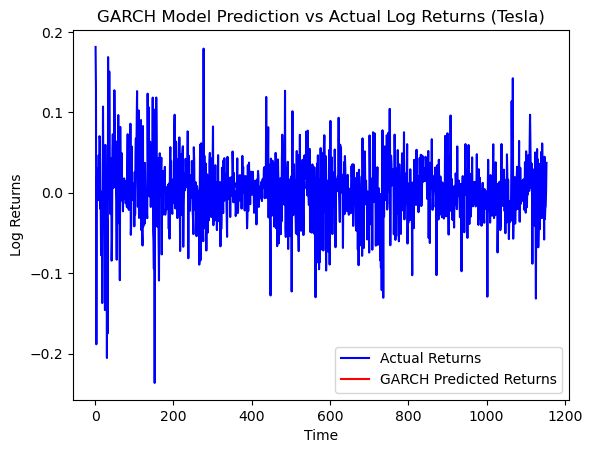

RMSE value is: nan


In [28]:
# Load stock data (assuming 'stock' DataFrame exists)
Y = np.diff(np.log(stock['Adj Close'].values))
T = Y.shape[0]

# Initial parameter guess
param0 = np.array([np.mean(Y), np.var(Y) / 400, 0.1, 0.03])

# Minimize the negative log likelihood
results = minimize(garch, param0, args=(Y, T), method='BFGS', tol=1e-2, options={'disp': True})
param_star = results.x

# Generate GARCH path using the optimized parameters
path, vol = garch_path(param_star, Y, T)
Y_GARCH = path

# Plotting Actual vs Predicted Log Returns
timevec = np.linspace(1, T, T)
plt.plot(timevec, Y, 'b', label='Actual Returns')
plt.plot(timevec, Y_GARCH, 'r', label='GARCH Predicted Returns')
plt.xlabel('Time')
plt.ylabel('Log Returns')
plt.title('GARCH Model Prediction vs Actual Log Returns (Tesla)')
plt.legend()
plt.show()

# Calculate RMSE
RMSE = np.sqrt(np.mean((Y_GARCH - Y) ** 2))
print(f'RMSE value is: {RMSE}')

## Kalman Filter

[*********************100%***********************]  1 of 1 completed


Optimization terminated successfully.
         Current function value: 4097.014116
         Iterations: 150
         Function evaluations: 1095
         Gradient evaluations: 219


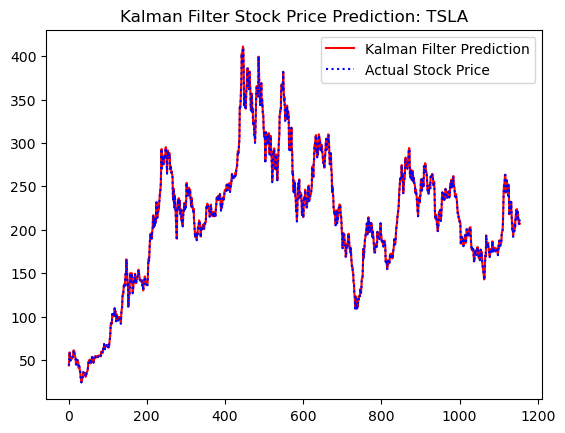

RMSE value is: $ 0.8600117511381193


In [29]:
#Kalman filter code to predict Tesla's daily stock prices
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf

stock_symbol = 'TSLA'

# Download stock data
stock = yf.download(stock_symbol, start_date, end_date)
def kalman_filter(param, *args):
    # initialize params
    Z = param[0]
    T = param[1]
    H = param[2]
    Q = param[3]
    # initialize vector values:
    u_predict, u_update, P_predict, P_update, v, F = {}, {}, {}, {}, {}, {}
    Y, S = args
    u_update[0] = Y[0]
    u_predict[0] = u_update[0]
    P_update[0] = np.var(Y) / 4
    P_predict[0] = T * P_update[0] * np.transpose(T) + Q
    Likelihood = 0
    for s in range(1, S):
        F[s] = Z * P_predict[s - 1] * np.transpose(Z) + H
        v[s] = Y[s - 1] - Z * u_predict[s - 1]
        u_update[s] = u_predict[s - 1] + P_predict[s - 1] * np.transpose(Z) * (1 / F[s]) * v[s]
        u_predict[s] = T * u_update[s]
        P_update[s] = P_predict[s - 1] - P_predict[s - 1] * np.transpose(Z) * (1 / F[s]) * Z * P_predict[s - 1]
        P_predict[s] = T * P_update[s] * np.transpose(T) + Q
        Likelihood += (1 / 2) * np.log(2 * np.pi) + (1 / 2) * np.log(abs(F[s])) + (1 / 2) * np.transpose(v[s]) * (1 / F[s]) * v[s]

    return Likelihood

def kalman_smoother(params, *args):
    # initialize params
    Z = params[0]
    T = params[1]
    H = params[2]
    Q = params[3]
    # initialize vector values:
    u_predict, u_update, P_predict, P_update, v, F = {}, {}, {}, {}, {}, {}
    Y, S = args
    u_update[0] = Y[0]
    u_predict[0] = u_update[0]
    P_update[0] = np.var(Y) / 4
    P_predict[0] = T * P_update[0] * np.transpose(T) + Q
    for s in range(1, S):
        F[s] = Z * P_predict[s - 1] * np.transpose(Z) + H
        v[s] = Y[s - 1] - Z * u_predict[s - 1]
        u_update[s] = u_predict[s - 1] + P_predict[s - 1] * np.transpose(Z) * (1 / F[s]) * v[s]
        u_predict[s] = T * u_update[s]
        P_update[s] = P_predict[s - 1] - P_predict[s - 1] * np.transpose(Z) * (1 / F[s]) * Z * P_predict[s - 1]
        P_predict[s] = T * P_update[s] * np.transpose(T) + Q

    u_smooth, P_smooth = {}, {}
    u_smooth[S - 1] = u_update[S - 1]
    P_smooth[S - 1] = P_update[S - 1]
    for t in range(S - 1, 0, -1):
        u_smooth[t - 1] = u_update[t] + P_update[t] * np.transpose(T) / P_predict[t] * (u_smooth[t] - T * u_update[t])
        P_smooth[t - 1] = P_update[t] + P_update[t] * np.transpose(T) / P_predict[t] * (P_smooth[t] - P_predict[t]) / P_predict[t] * T * P_update[t]

    smooth_path = u_smooth
    return smooth_path

Y = stock['Adj Close'].values
S = Y.shape[0]

# Initial parameters
param0 = np.array([0.24, 4.25, np.var(Y) / 2000, np.var(Y) / 50])
results = minimize(kalman_filter, param0, args=(Y, S), method='BFGS', tol=1e-2, options={'disp': True})

# Smoothe and visualize the estimated path
param_star = results.x
path = kalman_smoother(param_star, Y, S)
sorted_path = dict(sorted(path.items()))
Y_kalmanFilter = sorted_path.values()

# Plotting results
timevec = np.linspace(1, S, S)
plt.title('Kalman Filter Stock Price Prediction: ' + stock_symbol)
plt.plot(timevec, Y_kalmanFilter, 'r', label='Kalman Filter Prediction')
plt.plot(timevec, Y, 'b:', label='Actual Stock Price')
plt.legend()
plt.show()

# Extracting the dictionary values into a list (in the same order as keys)
kalman_values = list(Y_kalmanFilter)

# Calculate RMSE
RMSE = np.sqrt(np.mean((np.array(kalman_values) - np.array(Y)) ** 2))
print('RMSE value is: $', RMSE)


In [30]:
# Trading Rules and Signal Generation
